In [1]:
from copy import copy
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
import os

current_directory = os.getcwd()
print(current_directory)

c:\Users\phili\Python_Projects\bioinf_kernel_eval\jupyter_files


In [13]:
# Load the numpy data from a file, convert to a PyTorch tensor with shape (C, H, W) isntead of (H, W, C)
data = np.load("data0.npy")
data = np.moveaxis(data, -1, 0)
data.shape
# data = torch.from_numpy(data)
print(data[359])

# Print the shape and data type of the loaded array
print("Shape:", data.shape)
print("Data type:", data.dtype)

[[0.79976827 0.24057034 0.6232994  ... 0.36962655 0.33749267 0.46354488]
 [0.61892337 0.5406616  0.3534972  ... 0.30064458 0.34439585 0.48856616]
 [0.5556179  0.5494969  0.42947403 ... 0.2702188  0.21128996 0.30142334]
 ...
 [0.5274225  0.49966875 0.44996873 ... 0.78164136 0.47511327 0.58186376]
 [0.51765156 0.35987788 0.4899537  ... 0.5738614  0.5669274  0.75934577]
 [0.10170688 0.42527938 0.79932123 ... 0.9388014  0.58321375 0.53521985]]
Shape: (442, 302, 261)
Data type: float32


<class 'numpy.ndarray'>
0.7858336


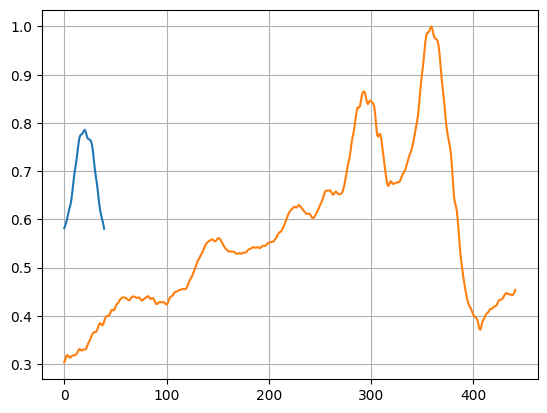

In [4]:
mean_pixel_value_every_dimension = np.mean(data, axis=(1, 2))


max_index_of_max_pixel_val = np.argmax(mean_pixel_value_every_dimension)

print(type(mean_pixel_value_every_dimension))

range = 20
peak_interval = mean_pixel_value_every_dimension[359-range:359+range]
peak_point = np.max(peak_interval)
print(peak_point)

plt.grid(visible=True)
plt.plot(peak_interval)

plt.plot(mean_pixel_value_every_dimension/peak_point)

# print(max_index_of_max_pixel_val)

(442, 302, 261)


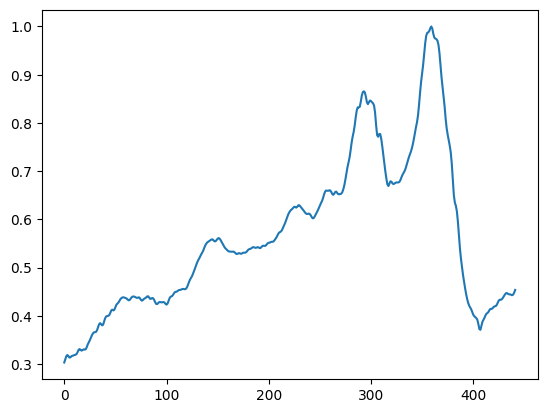

In [35]:
# Load the numpy data from a file, convert to a PyTorch tensor with shape (C, H, W) isntead of (H, W, C)
import torch
data = np.load("data0.npy")
data = np.moveaxis(data, -1, 0)


max_index_of_max_pixel_val = np.argmax(mean_pixel_value_every_dimension)

range = 20
peak_interval = mean_pixel_value_every_dimension[359-range:359+range]
peak_point = np.max(peak_interval)

data = data/peak_point


mean_pixel_value_every_dimension = np.mean(data, axis=(1, 2))
print(data.shape)
plt.plot(mean_pixel_value_every_dimension)

data = torch.from_numpy(data)
# substract mean along each channel
mean = data.mean(dim=(1, 2), keepdim=True)
normalized_tensor = data - mean

In [50]:
import torch

# Create a tensor with size [442]
tensor = torch.randn(442)

# Slice the tensor
sliced_tensor = tensor[0:10]

# Example slicing ranges
start = 0  # Start index (inclusive)
end = 10   # End index (exclusive)

# Print the sliced tensor
print(sliced_tensor)


tensor([-0.1674,  0.7765,  0.1407,  0.6800, -0.8813,  0.0149, -0.0074,  0.2871,
        -1.6233,  1.5759])


In [25]:
max(mean_pixel_value_every_dimension)

tensor(0.7858)

In [7]:
#int_number_feature -> Anzahl der Wellenzahlen./Channel
#tiny ist ein kleiner floating point(1e-9 bei mir) gegen Zero-division ect.
#Bei max_wavenumber müsst ihr wie besprochen den Peak der Amid1-Bande angeben.
#Mit dem Integral müsst ihr schauen ob es so bei euch passt. Orientiert euch einfach dabei an den Masken.

def Normalize_spectral_data(image, int_number_feature, max_wavenumber=224, max_integral=100, tiny=1e-9):
	img = copy(image)
	min_values, _  = torch.min(image, 0)
	max_ratio = 1 / (img[max_wavenumber, :, :] - min_values + tiny)
	#print(max_ratio)
	for wavenumber in range(int_number_feature):
		img[wavenumber, :, :] = (img[wavenumber, :, :] - min_values) * max_ratio

	mask_bad_spectra = torch.trapz(img, dim=0) > max_integral
	img[:, mask_bad_spectra] = tiny

	return img.float()


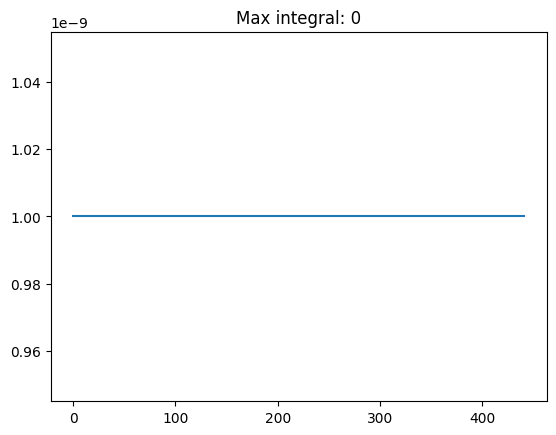

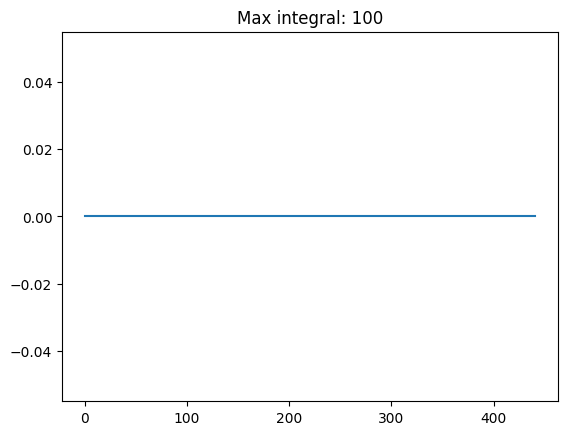

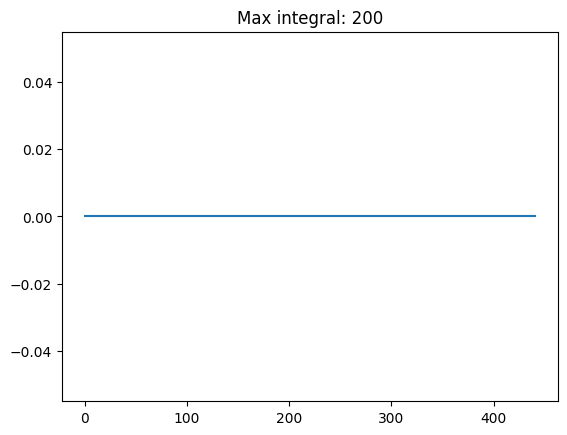

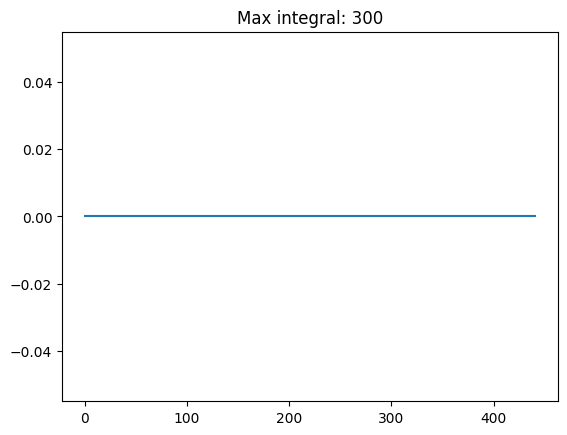

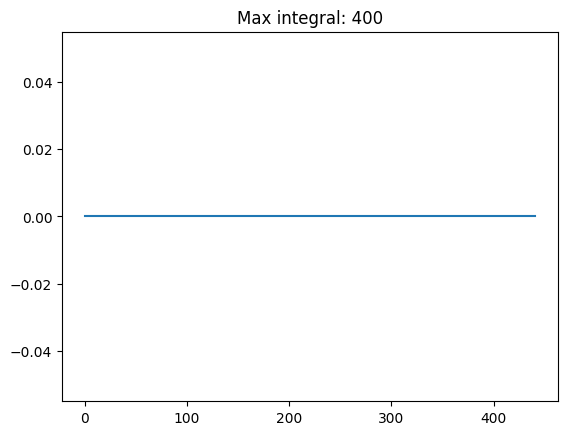

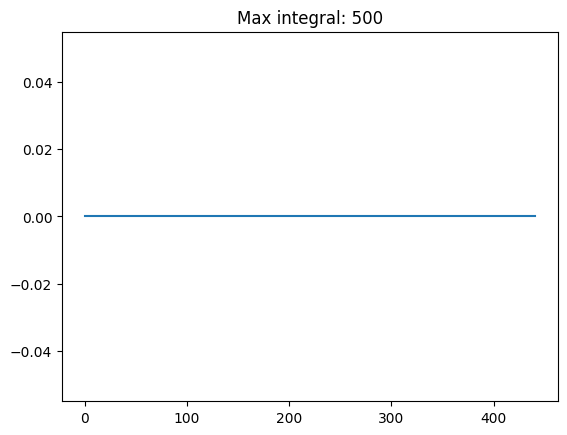

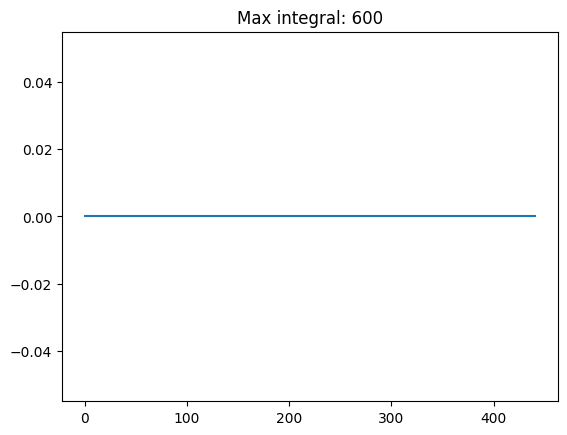

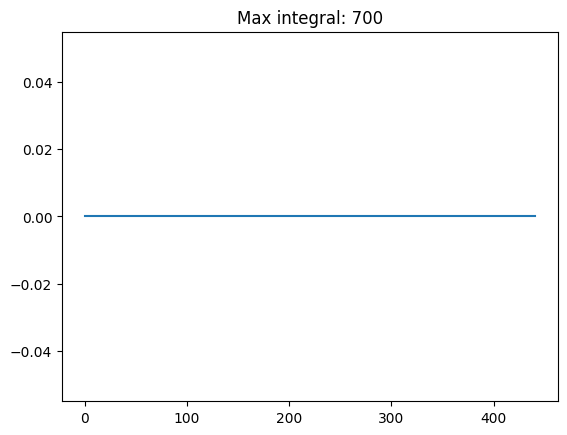

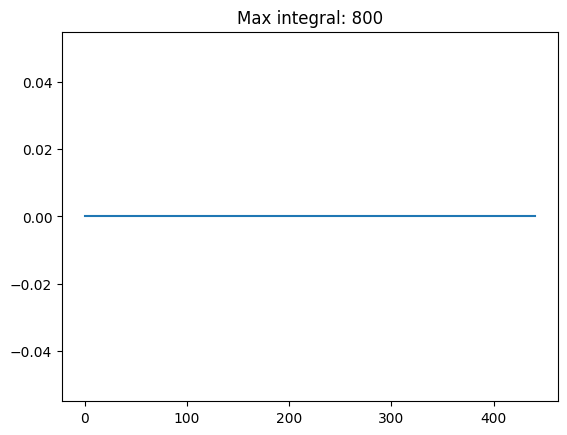

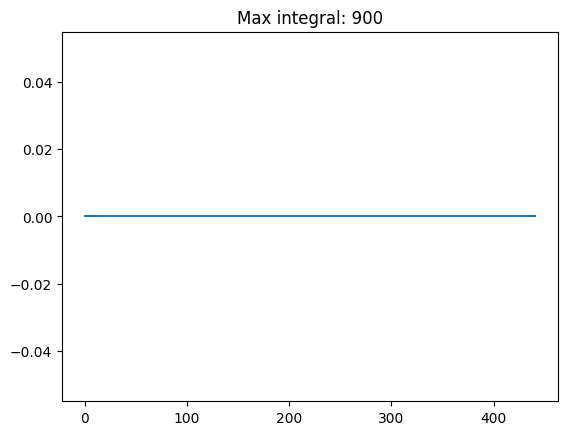

In [8]:
for i in range(0, 1000, 100):
	img = Normalize_spectral_data(image=data, int_number_feature=442, max_wavenumber=max_index_of_max_pixel_val, max_integral=i)
	plt.figure()
	plt.title(f"Max integral: {i}")
	plt.plot(torch.mean(img, (1, 2)))